<a href="https://colab.research.google.com/github/Choa-Lee/UNIUNI_project/blob/master/Action_classification_CNN%2BLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abnormal action classification using CNN+LSTM
## Last revised by cho : 20.08.02

# Setting Environment

In [37]:
%cd /content/drive/My Drive/WISET/UNI_project/data
!pwd

/content/drive/My Drive/WISET/UNI_project/data
/content/drive/My Drive/WISET/UNI_project/data


In [38]:
import os
import glob
import numpy as np
import cv2

In [39]:
path = os.getcwd()
print(path)

all_data_path = path+'/img'
normal_data_path = path+'/label_normal'
abnormal1_data_path = path+'/label_abnormal1'
abnormal2_data_path = path+'/label_abnormal2'

Class = ['normal', 'abnormal1', 'abnormal2']
nClasses = len(Class)

/content/drive/My Drive/WISET/UNI_project/data


In [40]:
file_list = glob.glob(all_data_path+'/*')
file_list_jpg = [file for file in file_list if file.endswith(".jpg")]

normal_list = glob.glob(normal_data_path+'/*')
normal_list_jpg = [file for file in normal_list if file.endswith(".jpg")]

abnormal1_list = glob.glob(abnormal1_data_path+'/*')
abnormal1_list_jpg = [file for file in abnormal1_list if file.endswith(".jpg")]

abnormal2_list = glob.glob(abnormal2_data_path+'/*')
abnormal2_list_jpg = [file for file in abnormal2_list if file.endswith(".jpg")]

In [41]:
print(len(file_list_jpg))
print(len(normal_list_jpg))
print(len(abnormal1_list_jpg))
print(len(abnormal2_list_jpg))
print(len(normal_list_jpg) + len(abnormal1_list_jpg) + len(abnormal2_list_jpg))

11320
5488
2385
3451
11324


# Load Data

In [42]:
data = []; labels = []
nfiles=2381

for image_path in normal_list_jpg:
  while len(labels) < int(nfiles):
    image = cv2.imread(image_path)
    image/255
    # image=image.reshape(image.shape[0]*image.shape[1],image.shape[2])
    label = Class[0]

    data.append(image)
    labels.append(label)

print(len(data))
print(len(labels))

for image_path in abnormal1_list_jpg:
  while len(labels) < int(nfiles*2):
    image = cv2.imread(image_path)
    image/255
    # image=image.reshape(image.shape[0]*image.shape[1],image.shape[2])
    label = Class[1]

    data.append(image)
    labels.append(label)

print(len(data))
print(len(labels))

for image_path in abnormal2_list_jpg:
  while len(labels) < int(nfiles*3):
    image = cv2.imread(image_path)
    image/255
    # image=image.reshape(image.shape[0]*image.shape[1],image.shape[2])
    label = Class[2]

    data.append(image)
    labels.append(label)

print(len(data))
print(len(labels))

print(np.shape(image))

2381
2381
4762
4762
7143
7143
(60, 80, 3)


In [43]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Reshape, Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import LSTM, TimeDistributed, Dropout 

In [44]:
data = np.array(data)
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [45]:
print(np.shape(data))

(7143, 60, 80, 3)


In [46]:
(train_x, test_x, train_y, test_y) = train_test_split(data, labels, test_size=0.25, 
                                                  stratify=labels, random_state=42)

In [47]:
# image = cv2.imread(abnormal2_list[0])
print(np.shape(image))
print(np.shape(train_x))
print(np.shape(test_x))
print(np.shape(train_y))
print(np.shape(test_y))

(60, 80, 3)
(5357, 60, 80, 3)
(1786, 60, 80, 3)
(5357, 3)
(1786, 3)


# Model


##CNN-LSTM


In [48]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2,2), strides = (1,1), padding = 'same',
                 input_shape = (train_x.shape[1],train_x.shape[2],train_x.shape[3])))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Reshape(target_shape=(30*40, 32)))
model.add(LSTM(50, return_sequences = False))

model.add(Dense(10))
model.add(Dense(3))
model.add(Activation('softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 60, 80, 32)        416       
_________________________________________________________________
activation_10 (Activation)   (None, 60, 80, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 40, 32)        0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 1200, 32)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_10 (Dense)             (None, 3)                

In [49]:
import matplotlib.pyplot as plt

In [51]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2,2), strides = (1,1), padding = 'same',
                 input_shape = (train_x.shape[1],train_x.shape[2],train_x.shape[3])))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Reshape(target_shape=(30*40, 32)))
model.add(LSTM(50, return_sequences = False))

model.add(Dense(10))
model.add(Dense(3))
model.add(Activation('softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 60, 80, 32)        416       
_________________________________________________________________
activation_12 (Activation)   (None, 60, 80, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 40, 32)        0         
_________________________________________________________________
reshape_6 (Reshape)          (None, 1200, 32)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_12 (Dense)             (None, 3)                

Epoch 1/10
54/54 [==============================] - 4s 69ms/step - loss: 0.4295 - accuracy: 0.9606 - val_loss: 0.1471 - val_accuracy: 1.0000
Epoch 2/10
54/54 [==============================] - 3s 63ms/step - loss: 0.0791 - accuracy: 1.0000 - val_loss: 0.0391 - val_accuracy: 1.0000
Epoch 3/10
54/54 [==============================] - 3s 63ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 4/10
54/54 [==============================] - 3s 63ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 5/10
54/54 [==============================] - 3s 63ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 6/10
54/54 [==============================] - 3s 63ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 7/10
54/54 [==============================] - 3s 63ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 8/10
54

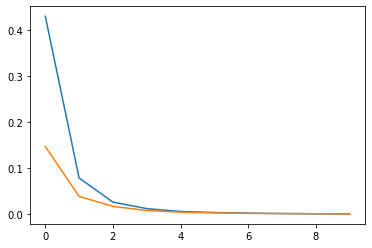

In [52]:
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, batch_size=100, verbose=1)
# loss, acc = model.evaluate(test_x, test_y)


plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='test_loss')

In [55]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2,2), strides = (1,1), padding = 'same',
                 input_shape = (train_x.shape[1],train_x.shape[2],train_x.shape[3])))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Reshape(target_shape=(30*40, 32)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(10))

model.add(Dense(10))
model.add(Dense(3))
model.add(Activation('softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 60, 80, 32)        416       
_________________________________________________________________
activation_16 (Activation)   (None, 60, 80, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 40, 32)        0         
_________________________________________________________________
reshape_8 (Reshape)          (None, 1200, 32)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 1200, 50)          16600     
_________________________________________________________________
lstm_9 (LSTM)                (None, 10)                2440      
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

Epoch 1/10
54/54 [==============================] - 7s 128ms/step - loss: 0.7054 - accuracy: 0.8695 - val_loss: 0.2140 - val_accuracy: 1.0000
Epoch 2/10
54/54 [==============================] - 6s 110ms/step - loss: 0.0856 - accuracy: 1.0000 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 3/10
54/54 [==============================] - 6s 114ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 4/10
54/54 [==============================] - 6s 113ms/step - loss: 0.1248 - accuracy: 0.9711 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 5/10
54/54 [==============================] - 6s 115ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 6/10
54/54 [==============================] - 6s 116ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 7/10
54/54 [==============================] - 6s 115ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 

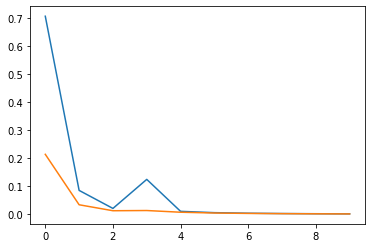

In [56]:
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, batch_size=100, verbose=1)
# loss, acc = model.evaluate(test_x, test_y)


plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='test_loss')